In [20]:
# Importing libraries needed for the project
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress
import matplotlib.pyplot as plt
import plotly.express as px
from math import ceil #The math.ceil() method rounds a number UP to the nearest integer, if necessary, and returns the result.
from urllib.request import urlopen
import json
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning

In [21]:
# Load the Excel file into a DataFrame
data = pd.read_excel("./All_time_together.xlsx")

# Save the DataFrame as a CSV file
data.to_csv("./All_time_together.csv", index=False)

# Display the first few rows (optional, just to check the data)
data.head()


,User Name,Time limit for each question,Score(%),Score 1,Attempt Date,Taken Time,What is your gender?,How old are you?,"An object with a mass of 2 kg is lifted to a height of 10 meters. After being released, how much kinetic energy will the object have just before hitting the ground? (Assume g9.8m/s^2 and ignore air resistance)",Answer,...,Time 3,How confident are you?,What are characteristics of polynomial functions and other nonlinear graphs?,Answer.3,Time 4,How confident are you in your answers.2,The collapse of Communist rule throughout Eastern Europe occurred peacefully in all of the following countries EXCEPT,Answer.4,Time 5,How confident are you in your answers.3
0,Guest1,2 min,14.285714,1,11-6-2024 12:43:26 PM,0:3:27,Female,28,Incorrect,NaN,...,00:02:00,Not at all confident,Correct,A polynomial function can be represented in fa...,00:01:50,Not at all confident,Incorrect,Hungary,00:02:00,Not at all confident
1,Guest2,2 min,14.285714,1,11-6-2024 09:56:16 AM,0:3:3,Female,25,Correct,196 J,...,00:01:16,Not at all confident,Incorrect,Polynomial functions are linear and have only ...,00:00:23,Not at all confident,Incorrect,NaN,00:00:02,Not at all confident
2,Guest3,2 min,14.285714,1,11-6-2024 09:40:01 AM,0:4:39,Male,26,Incorrect,NaN,...,00:01:59,Not at all confident,Incorrect,Rational functions have their input in the num...,00:01:48,Slightly confident,Incorrect,East Germany,00:01:54,Not at all confident
3,Guest4,2 min,14.285714,1,11-6-2024 09:25:58 AM,0:3:7,Male,23,Incorrect,98 J,...,00:00:33,Slightly confident,Correct,A polynomial function can be represented in fa...,00:01:24,Slightly confident,Incorrect,Czechoslovakia,00:01:54,Not at all confident
4,Guest5,2 min,28.571428,1,11-6-2024 09:11:37 AM,0:3:3,Male,22,Correct,196 J,...,00:00:20,Extremely confident,Correct,A polynomial function can be represented in fa...,00:00:55,Extremely confident,Correct,Romania,00:01:55,Quite confident


In [22]:
# Calculate the total score from the two score columns
data['Total_Score'] = data['Score 1'] + data['Score 2']

# Calculate % of total score
data['Total_Score_%'] = (data['Total_Score'] / 5) * 100

# Display all the scores
data[['Score 1', 'Score 2', 'Total_Score', 'Total_Score_%']]

,Score 1,Score 2,Total_Score,Total_Score_%
0,1,1,2,40.0
1,1,1,2,40.0
2,1,1,2,40.0
3,1,2,3,60.0
4,1,3,4,80.0
5,1,3,4,80.0
6,0,2,2,40.0
7,1,3,4,80.0
8,1,2,3,60.0
9,2,3,5,100.0


In [23]:
# Convert the time columns to seconds and sum them
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Sum the times and make a total time data column
data['Total_Time'] = data[['Time 1', 'Time 2', 'Time 3', 'Time 4', 'Time 5']].applymap(time_to_seconds).sum(axis=1)

# Convert time to Hour, minutes and seconds format
def seconds_to_hms(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f"{h:02}:{m:02}:{s:02}"

data['Total_Time_HHMMSS'] = data['Total_Time'].apply(seconds_to_hms)

In [24]:
data['Total_Time_HHMMSS']

0     00:08:56
1     00:04:11
2     00:09:29
3     00:06:36
4     00:05:56
5     00:06:38
6     00:06:50
7     00:09:03
8     00:07:40
9     00:06:08
10    00:08:02
11    00:08:47
12    00:02:46
13    00:07:35
14    00:09:02
15    00:11:45
16    00:06:23
17    00:08:41
18    00:12:45
19    00:15:54
20    00:12:34
21    00:09:54
22    00:09:25
23    00:09:15
24    00:05:17
25    00:09:01
26    00:07:09
27    00:08:36
28    00:10:27
29    00:09:46
Name: Total_Time_HHMMSS, dtype: object

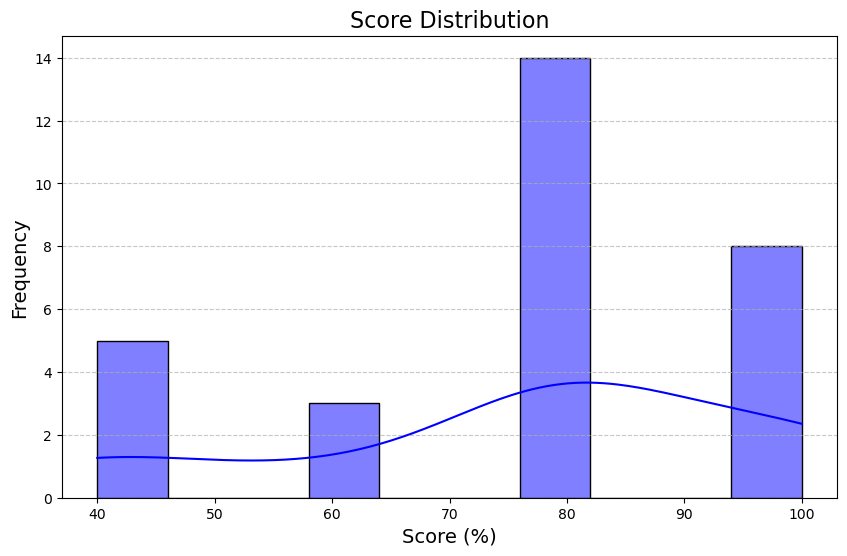

In [25]:
# Create a histogram for score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Score_%'], bins=10, kde=True, color='blue', edgecolor='black')

# Customize the plot
plt.title('Score Distribution', fontsize=16)
plt.xlabel('Score (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

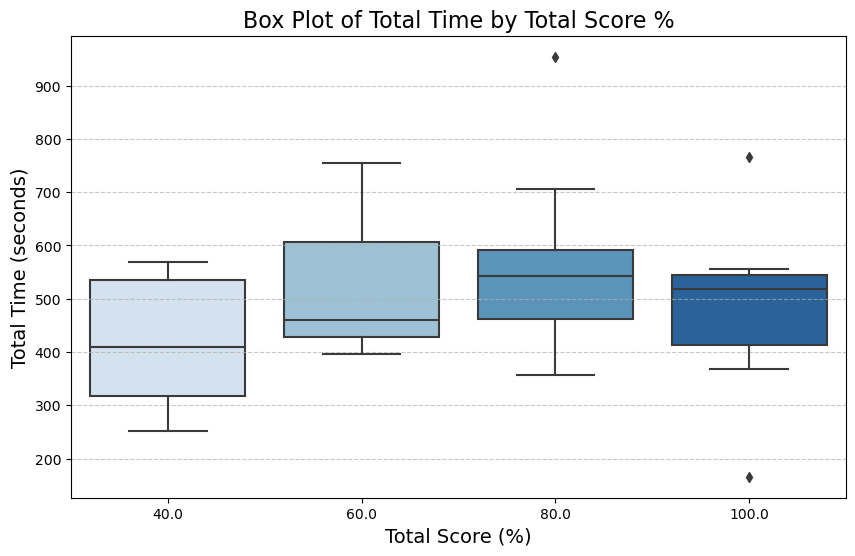

In [29]:
data_cleaned = data.dropna(subset=['Total_Time', 'Total_Score_%'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Score_%', y='Total_Time', data=data_cleaned, palette='Blues')
plt.title('Box Plot of Total Time by Total Score %', fontsize=16)
plt.xlabel('Total Score (%)', fontsize=14)
plt.ylabel('Total Time (seconds)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


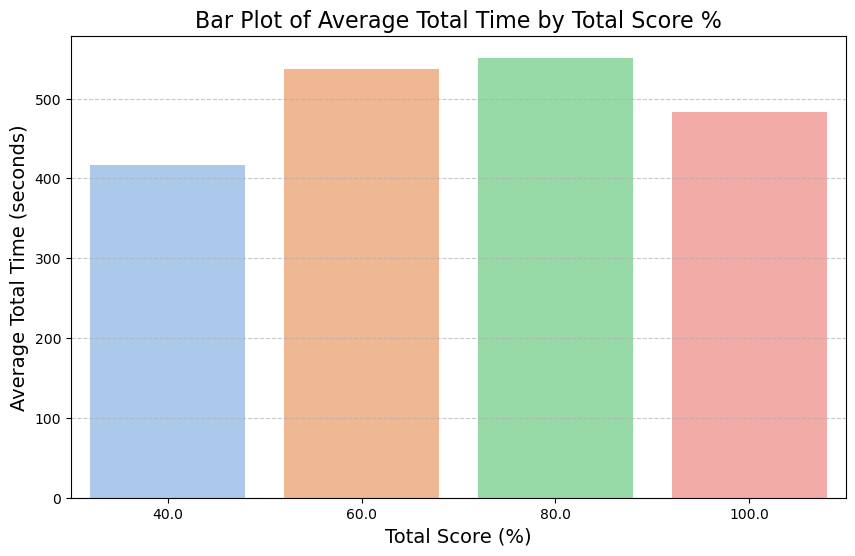

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Score_%', y='Total_Time', data=data_cleaned, ci=None, palette='pastel')
plt.title('Bar Plot of Average Total Time by Total Score %', fontsize=16)
plt.xlabel('Total Score (%)', fontsize=14)
plt.ylabel('Average Total Time (seconds)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()